In [26]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import copy
import zipfile
import os
import rasterio 
from rasterio.plot import show





ModuleNotFoundError: No module named 'seaborn'

In [9]:
                    #DESCOMPRIMIR ARCHIVO Y GUARDAR LAS IMAGENES

#Definir como variable la ruta del archivo a descomprimir

ruta_archivo_zip = 'C:/Users/juli/Documents/Documentos/Maestria/Planning/TrabajoFinal/Los-Molinos_2023-08-02_7_all_bands.zip'

# Directorio de destino para la descompresión
Imagen = 'C:/Users/juli/Documents/Documentos/Maestria/Planning/TrabajoFinal/Trabajo_Final/Imagen'


# Crear directorio de destino si no existe
if not os.path.exists(Imagen):
    os.makedirs(Imagen)
    
# Descomprimir el archivo ZIP
with zipfile.ZipFile(ruta_archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(Imagen)

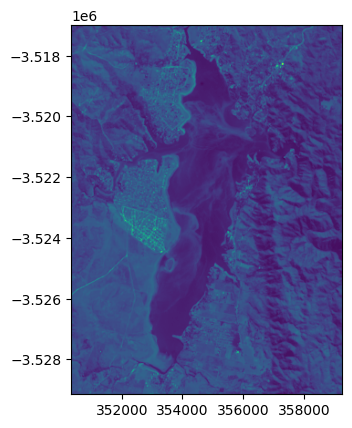

[[ 9659  9764  9721 ...  8925  8835  9105]
 [ 9618  9473  9798 ...  8882  8856  8835]
 [ 9738  9351  9241 ...  8948  8847  8738]
 ...
 [10012 10040  9898 ...  9624 10267 10548]
 [ 9866  9804  9447 ...  9341 10052 10640]
 [ 9563  9567  9314 ...  8967  9931 10551]]


In [10]:

#ABRIR LA IMAGEN DE LA BANDA 3 Y LEER SUS DATOS

ruta_bandas = 'C:/Users/juli/Documents/Documentos/Maestria/Planning/TrabajoFinal/Trabajo_Final/Imagen/'

Green = "GREEN_B3.tif"

ruta_banda3 = ruta_bandas + Green

B3 = rasterio.open(ruta_banda3)
rasterio.plot.show (B3)

#datos_banda3 = B3.read(1)

with rasterio.open(ruta_banda3) as src:
    datos_banda3 = src.read(1)

print (datos_banda3)



In [23]:
#ESTADÍSTICA DESCRIPTIVA DE BANDA 3

cantidad_elementos = datos_banda3.size
print("Cantidad total de elementos en la matriz:", cantidad_elementos)

min_value = np.min(datos_banda3)
max_value = np.max(datos_banda3)
mean_value = np.mean(datos_banda3)
median_value = np.median(datos_banda3)
std_dev = np.std(datos_banda3)

# Imprimir los resultados
print("Valor mínimo:", min_value)
print("Valor máximo:", max_value)
print("Valor promedio:", mean_value)
print("Valor mediano:", median_value)
print("Desviación estándar:", std_dev)

def calcular_percentiles(datos_banda3):
    perc_5 = np.percentile(datos_banda3, 5)
    perc_95 = np.percentile(datos_banda3, 95)
    return perc_5, perc_95

#AVERIGUAR SI LA MATRIZ ES DE TIPO FLOAT O NO 

type(datos_banda3)
if datos_banda3.dtype == float:
    print("La matriz es de tipo float.")
else:
    print("La matriz no es de tipo float.")

Cantidad total de elementos en la matriz: 120988
Valor mínimo: 7215
Valor máximo: 18480
Valor promedio: 9436.035284491023
Valor mediano: 9474.0
Desviación estándar: 863.3266639231139
La matriz no es de tipo float.


In [12]:
#AL NO SER DE TIPO FLOAT, SE CONVIERTE EN FLOAT PARA ENMASCARAR NAN:
matrizfloatB3 = datos_banda3.astype(float)
print (matrizfloatB3)

#chequeo si se convirtió a float o no

type(matrizfloatB3)
if matrizfloatB3.dtype == float:
    print("La matriz es de tipo float.")
else:
    print("La matriz no es de tipo float.")

[[ 9659.  9764.  9721. ...  8925.  8835.  9105.]
 [ 9618.  9473.  9798. ...  8882.  8856.  8835.]
 [ 9738.  9351.  9241. ...  8948.  8847.  8738.]
 ...
 [10012. 10040.  9898. ...  9624. 10267. 10548.]
 [ 9866.  9804.  9447. ...  9341. 10052. 10640.]
 [ 9563.  9567.  9314. ...  8967.  9931. 10551.]]
La matriz es de tipo float.


In [32]:
#CALCULO DE PERCENTILES PARA VER OUTLIERS -BANDA 3-.

percentil_5 = np.nanpercentile(matrizfloatB3, 5)
percentil_95 = np.nanpercentile(matrizfloatB3, 95)

outliers = matrizfloatB3[(matrizfloatB3 < percentil_5) | (matrizfloatB3 > percentil_95)]

cantidad_outliers = len(outliers)

print("Cantidad de outliers:", cantidad_outliers)

print (outliers)

#Detectar la ubicación de los outliers en la matriz:

outliers_indices = np.where((matrizfloatB3 < percentil_5) | (matrizfloatB3 > percentil_95))

matrizfloatB3[outliers_indices] = np.nan

print(matrizfloatB3[outliers_indices])


Cantidad de outliers: 5188
[8920. 8921. 8902. ... 8898. 8910. 9931.]
[nan nan nan ... nan nan nan]


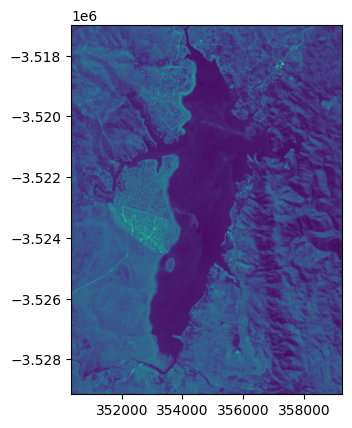

In [14]:
#APERTURA Y LECTURA DE BANDA 4

ruta_bandas = 'C:/Users/juli/Documents/Documentos/Maestria/Planning/TrabajoFinal/Trabajo_Final/Imagen/'

Red = "RED_B4.tif"

ruta_banda4 = ruta_bandas + Red

B4 = rasterio.open(ruta_banda4)
rasterio.plot.show (B4)

datos_banda4 = B4.read(1)

In [15]:
#ESTADÍSTICA DESCRIPTIVA DE BANDA 4

min_value = np.min(datos_banda4)
max_value = np.max(datos_banda4)
mean_value = np.mean(datos_banda4)
median_value = np.median(datos_banda4)
std_dev = np.std(datos_banda4)

# Imprimir los resultados
print("Valor mínimo:", min_value)
print("Valor máximo:", max_value)
print("Valor promedio:", mean_value)
print("Valor mediano:", median_value)
print("Desviación estándar:", std_dev)

#VER SI LA MATRIZ ES DE DATOS TIPO FLOAT O NO

if datos_banda4.dtype == float:
    print("La matriz es de tipo float.")
else:
    print("La matriz no es de tipo float.")

Valor mínimo: 7141
Valor máximo: 19967
Valor promedio: 9755.10831652726
Valor mediano: 9850.0
Desviación estándar: 1271.2236797643907
La matriz no es de tipo float.


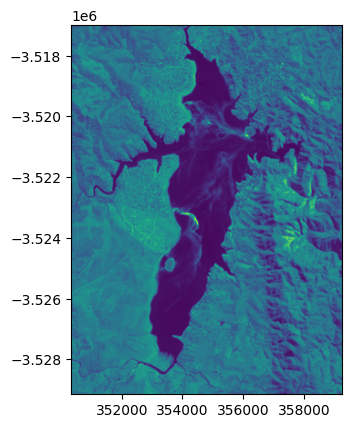

[[13495 13951 13667 ... 11744 11431 12245]
 [13157 12621 13654 ... 12091 11716 11498]
 [13043 12228 12330 ... 12002 11607 11488]
 ...
 [14485 14631 14403 ... 13460 15073 15946]
 [14340 14321 14057 ... 12976 14749 16002]
 [14118 14078 13713 ... 12078 14206 15863]]


In [16]:
#BANDA 5

ruta_bandas = 'C:/Users/juli/Documents/Documentos/Maestria/Planning/TrabajoFinal/Trabajo_Final/Imagen/'

NIR = "NIR_B5.tif"

ruta_banda5 = ruta_bandas + NIR

B5 = rasterio.open(ruta_banda5)
rasterio.plot.show (B5)

datos_banda5 = B5.read(1)

print(datos_banda5)




In [17]:
#ESTADISTICA DESCRIPTIVA BANDA 5

min_value = np.min(datos_banda5)
max_value = np.max(datos_banda5)
mean_value = np.mean(datos_banda5)
median_value = np.median(datos_banda5)
std_dev = np.std(datos_banda5)

# Imprimir los resultados
print("Valor mínimo:", min_value)
print("Valor máximo:", max_value)
print("Valor promedio:", mean_value)
print("Valor mediano:", median_value)
print("Desviación estándar:", std_dev)

#VER SI LA MATRIZ ES DE DATOS TIPO FLOAT O NO

if datos_banda5.dtype == float:
    print("La matriz es de tipo float.")
else:
    print("La matriz no es de tipo float.")



Valor mínimo: 7147
Valor máximo: 24850
Valor promedio: 12959.817568684497
Valor mediano: 13704.0
Desviación estándar: 2638.935982836838
La matriz no es de tipo float.


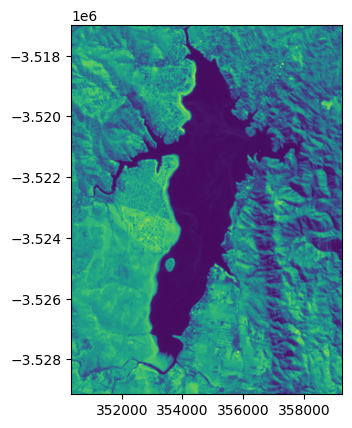

[[16330 17141 16660 ... 13386 13733 14550]
 [16174 15823 16728 ... 13842 13406 12918]
 [16395 15149 14822 ... 13868 13455 12631]
 ...
 [17962 17605 17049 ... 16513 19109 20705]
 [17360 16896 16283 ... 15373 17864 20465]
 [16010 16576 16787 ... 14223 17286 19924]]


In [4]:
#BANDA 6

ruta_bandas = 'C:/Users/juli/Documents/Documentos/Maestria/Planning/TrabajoFinal/Trabajo_Final/Imagen/'

SWIR_B6 = "SWIR_B6.tif"

ruta_banda6 = ruta_bandas + SWIR_B6

B6 = rasterio.open(ruta_banda6)
rasterio.plot.show (B6)

datos_banda6 = B6.read(1)

print(datos_banda6)



In [5]:
#ESTADISTICA DESCRIPTIVA BANDA 6

min_value = np.min(datos_banda6)
max_value = np.max(datos_banda6)
mean_value = np.mean(datos_banda6)
median_value = np.median(datos_banda6)
std_dev = np.std(datos_banda6)

# Imprimir los resultados
print("Valor mínimo:", min_value)
print("Valor máximo:", max_value)
print("Valor promedio:", mean_value)
print("Valor mediano:", median_value)
print("Desviación estándar:", std_dev)

#VER SI LA MATRIZ ES DE DATOS TIPO FLOAT O NO

if datos_banda6.dtype == float:
    print("La matriz es de tipo float.")
else:
    print("La matriz no es de tipo float.")

Valor mínimo: 7013
Valor máximo: 25515
Valor promedio: 14347.914173306444
Valor mediano: 15263.0
Desviación estándar: 3999.9244354439425
La matriz no es de tipo float.
